# Sentimment Analysis of Cryptocurrencies

#### This notebook is the first part of the Development of the sentiment analysis solution that analyses twitter comments on cryptocurrencies for market research

For this intial stage the primary focus is exploring and evaluating the posssible models for sentiment anlaysis 


Data used in this project is from DataWorld link for the data below 

https://data.world/mercal/btc-tweets-sentiment

In [1]:
import pandas as pd 
import numpy as np

In [2]:
# loading the dataset
sentiBitcoin = pd.read_csv("BTC_tweets_daily_example.csv")


2. Data preprocessing and EDA 

In [3]:
sentiBitcoin.shape

(50887, 7)

In [4]:
sentiBitcoin.dtypes

column_#       object
Date           object
Tweet          object
Screen_name    object
Source         object
Link           object
Sentiment      object
dtype: object

In [5]:
sentiBitcoin.describe()

,column_#,Date,Tweet,Screen_name,Source,Link,Sentiment
count,50873,50866,50866,50859,50859,50859,50859
unique,50861,23972,28137,21313,4855,1224,4
top,#Blockchain #XCM #cryptorevolution #bitcoin #t...,Fri Mar 23 07:01:42 +0000 2018,RT @GymRewards: https://t.co/Bm9sIxiiwU Check...,moneyblockchain,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
freq,7,20,672,854,25033,18032,22937


In [6]:
sentiBitcoin.head(10)

,column_#,Date,Tweet,Screen_name,Source,Link,Sentiment
0,0,Fri Mar 23 00:40:32 +0000 2018,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h...",myresumerocket,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['neutral']
1,1,Fri Mar 23 00:40:34 +0000 2018,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,BitMocro,[u'Bitcoin'],"<a href=""http://twitter.com/download/android"" ...",['neutral']
2,2,Fri Mar 23 00:40:35 +0000 2018,RT @tippereconomy: Another use case for #block...,hojachotopur,"[u'blockchain', u'Tipper', u'TipperEconomy']","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
3,3,Fri Mar 23 00:40:36 +0000 2018,free coins https://t.co/DiuoePJdap,denies_distro,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
4,4,Fri Mar 23 00:40:36 +0000 2018,RT @payvxofficial: WE are happy to announce th...,aditzgraha,[],"<a href=""http://twitter.com/download/android"" ...",['positive']
5,5,Fri Mar 23 00:40:36 +0000 2018,Copy successful traders automatically with Bit...,VictorS61164810,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
6,6,Fri Mar 23 00:40:37 +0000 2018,RT @bethereumteam: We're revealing our surpris...,ClarkKalel4,"[u'surprise', u'presents', u'crypto', u'bitcoin']","<a href=""http://twitter.com/download/android"" ...",['positive']
7,7,Fri Mar 23 00:40:37 +0000 2018,One click to start mining cryptocurrencies tog...,cloud_speaker,"[u'bitcoin', u'PaaS', u'cloudnetwork']","<a href=""http://itunes.apple.com/us/app/twitte...",['neutral']
8,8,Fri Mar 23 00:40:38 +0000 2018,"first speaker @digitsu\n\n""how we can get bitc...",MADinMelbourne,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
9,9,Fri Mar 23 00:40:40 +0000 2018,@p0nd3ea Bitcoin wasn't built to live on excha...,APompliano,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']


### Dropping coulmns not needed

In [7]:
sentiBitcoin = sentiBitcoin.drop(["column_#", "Date" , "Screen_name" , "Source", "Link"], axis=1)
sentiBitcoin

,Tweet,Sentiment
0,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h...",['neutral']
1,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,['neutral']
2,RT @tippereconomy: Another use case for #block...,['positive']
3,free coins https://t.co/DiuoePJdap,['positive']
4,RT @payvxofficial: WE are happy to announce th...,['positive']
...,...,...
50882,RT @fixy_app: Fixy Network brings popular cryp...,['positive']
50883,RT @bethereumteam: After a successful launch o...,['positive']
50884,"RT @GymRewards: Buy #GYMRewards Tokens, Bonus ...",['neutral']
50885,I added a video to a @YouTube playlist https:/...,['positive']


Expolring the catergories  

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

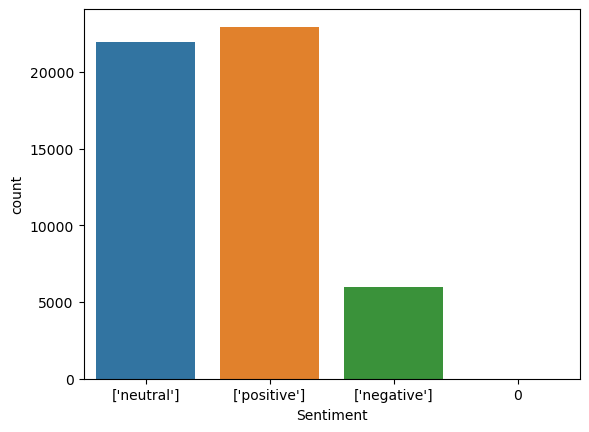

In [8]:
import seaborn as sns
sns.countplot(x= sentiBitcoin["Sentiment"])

In [9]:
sentiBitcoin['Sentiment'].value_counts()

['positive']    22937
['neutral']     21932
['negative']     5983
0                   7
Name: Sentiment, dtype: int64

- Data has 3 categories and there is a huge discrapency making the dataset imbalanced
- There is also a category that is un labaelled thet is of no interest and constitutes a small percentage 
- The sentiment is in text form hence the need to convert to int


In [10]:
# dropping the zero values 
sentiBitcoin.drop(sentiBitcoin[sentiBitcoin['Sentiment'] == '0'].index, inplace = True)

In [11]:
# checking for nulls
sentiBitcoin.isnull().sum()

Tweet        21
Sentiment    28
dtype: int64

In [12]:
sentiBitcoin = sentiBitcoin.dropna()
sentiBitcoin.isnull().sum()

Tweet        0
Sentiment    0
dtype: int64

In [13]:
sentiBitcoin['Sentiment'].value_counts()
# removed zero values 

['positive']    22937
['neutral']     21932
['negative']     5983
Name: Sentiment, dtype: int64

In [14]:
# solving the class imbalances 
from sklearn.utils import resample

In [15]:
sentiBitcoin['Sentiment'] = sentiBitcoin['Sentiment'].replace(["['positive']", "['neutral']", "['negative']"], [1, 0, -1])
sentiBitcoin['Sentiment'].value_counts()

C:\Users\BIDA19-025\AppData\Local\Temp\ipykernel_26708\1931971246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiBitcoin['Sentiment'] = sentiBitcoin['Sentiment'].replace(["['positive']", "['neutral']", "['negative']"], [1, 0, -1])


 1    22937
 0    21932
-1     5983
Name: Sentiment, dtype: int64

### Balancing the dataset

In [16]:
# https://elitedatascience.com/imbalanced-classes  refernce for code 

df_majority = sentiBitcoin[sentiBitcoin['Sentiment'] == 1.0]  
df_majority1 = sentiBitcoin[sentiBitcoin['Sentiment'] == 0.0] 
df_minority = sentiBitcoin[sentiBitcoin['Sentiment'] == -1.0] 

In [17]:
downsampledPositive = resample(df_majority, 
                            replace=False,   
                            n_samples= 5983,     
                            random_state=123) 



In [18]:
downsampledNeutral = resample(df_majority1, 
                            replace=False,   
                            n_samples= 5983,     
                            random_state=123) 


In [19]:
balancedSentiment  = pd.concat([downsampledPositive , df_minority ,  downsampledNeutral])

In [20]:
balancedSentiment.head()

,Tweet,Sentiment
15511,@grockrecords2 Bitcoin -Gold (BTG) do become ...,1
26220,"RT @Incapsula_com: As prices spike, the bitcoi...",1
12563,New post (Dutch Court Finds Bitcoin A Legitima...,1
49394,RT @bethereumteam: We have just hit 10K within...,1
280,RT @unicornhub_au: @zilliqa Here is my submiss...,1


 1    5983
-1    5983
 0    5983
Name: Sentiment, dtype: int64

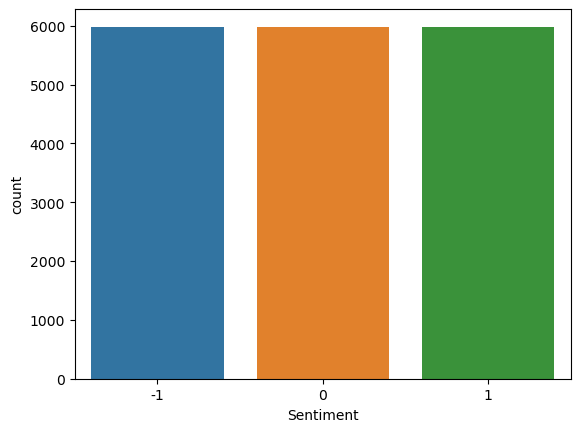

In [21]:
sns.countplot(x= balancedSentiment["Sentiment"])
balancedSentiment['Sentiment'].value_counts()

- data set has been balanced using simple donwn sampling the code was sourced from https://elitedatascience.com/imbalanced-classes

In [22]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import PlaintextCorpusReader
import re    
from nltk.stem.porter import *

In [23]:
example = balancedSentiment['Tweet'][50]
print(example)

Earn 500 Ramen with airdrop program: https://t.co/gMu9lnCwMO  
#RamenCoin $RAMEN #airdrop #bounty #ICO #ethereum… https://t.co/6lL6vYmbLS


Cleaning text form the Dataset

In [24]:
# stack overflow remove urls  https://stackoverflow.com/questions/2081168/python-nameerror
balancedSentiment['Tweet'] = balancedSentiment['Tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True).replace(r'https\S+', '', regex=True)
    

In [25]:
# stack over flow to remove special cahrecters 
balancedSentiment['Tweet']=balancedSentiment['Tweet'].str.replace('[^\w\s]', '')

C:\Users\BIDA19-025\AppData\Local\Temp\ipykernel_26708\184000899.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  balancedSentiment['Tweet']=balancedSentiment['Tweet'].str.replace('[^\w\s]', '')


In [26]:
balancedSentiment['Tweet']=balancedSentiment['Tweet'].str.lower()

In [27]:
balancedSentiment['Tweet']= balancedSentiment['Tweet'].replace('rt', '', regex=True)

In [28]:
balancedSentiment.head()

,Tweet,Sentiment
15511,grockrecords2 bitcoin gold btg do become popu...,1
26220,incapsula_com as prices spike the bitcoin ind...,1
12563,new post dutch cou finds bitcoin a legitimate ...,1
49394,bethereumteam we have just hit 10k within 48 ...,1
280,unicornhub_au zilliqa here is my submission f...,1


### Training different models for sentiment Classification

### Training on LSTM

In [37]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 

In [38]:
from sklearn.model_selection import train_test_split
#train test splits 
x_train, x_test, y_train, y_test = train_test_split(balancedSentiment['Tweet'].values, balancedSentiment['Sentiment'].values, test_size=0.30)

In [39]:
maxVocab = 16000
tokenizer = Tokenizer(num_words=maxVocab)
tokenizer.fit_on_texts(x_train)

In [40]:
# checking the word index and find out the vocabulary of the dataset
wordidx = tokenizer.word_index
V = len(wordidx)
print("datset length", V)

datset len 14971


In [41]:
vocab_size = 14767
embd_len = 4
max_words = 40

In [42]:
train_seq = tokenizer.texts_to_sequences(x_train)
test_seq = tokenizer.texts_to_sequences(x_test)
print('Training sequence: ', train_seq[0])
print('Testing sequence: ', test_seq[0])

Training sequence:  [644, 596, 691, 714, 28, 5, 86, 2271, 52, 79, 410, 42, 45, 122, 3, 73, 21, 2454, 214, 255, 75, 692]
Testing sequence:  [1, 148, 4830, 1, 1357, 17, 279, 14136, 148, 1, 67, 122, 279, 3374, 148, 23, 20, 68]


In [43]:
pad_train = pad_sequences(train_seq)
T = pad_train.shape[1]
print('The length of training sequence is: ', T)


The length of training sequence is:  30


In [44]:
# padding the test sequence
pad_test = pad_sequences(test_seq, maxlen=T)
print('The length of testing sequence is: ', pad_test.shape[1])

The length of testing sequence is:  30


In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, GlobalMaxPooling1D
from tensorflow.keras.models import Model

In [52]:
#defining neural network layer 
D = 50
M = 30

i = Input(shape=(T, ))   
x= Embedding(V+1, D)(i) g 
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(64,activation='relu')(x) #32
x = Dense(1,activation='sigmoid')(x) 

model = Model(i,x)

In [53]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [54]:
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 30)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 30, 50)            748600    
                                                                 
 lstm_1 (LSTM)               (None, 30, 30)            9720      
                                                                 
 global_max_pooling1d_1 (Glo  (None, 30)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 64)                1984      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                           

In [55]:
model.fit(pad_train, y_train, validation_data=(pad_test, y_test), epochs=20)

Epoch 1/20
393/393 [==============================] - 25s 42ms/step - loss: -16.2273 - accuracy: 0.4386 - val_loss: -64.9579 - val_accuracy: 0.5432
Epoch 2/20
393/393 [==============================] - 16s 40ms/step - loss: -202.4198 - accuracy: 0.5694 - val_loss: -379.9734 - val_accuracy: 0.5183
Epoch 3/20
393/393 [==============================] - 16s 40ms/step - loss: -652.6437 - accuracy: 0.6051 - val_loss: -910.9266 - val_accuracy: 0.5868
Epoch 4/20
393/393 [==============================] - 16s 41ms/step - loss: -1281.6893 - accuracy: 0.6303 - val_loss: -1554.9928 - val_accuracy: 0.5851
Epoch 5/20
393/393 [==============================] - 15s 37ms/step - loss: -2023.5758 - accuracy: 0.6367 - val_loss: -2308.6187 - val_accuracy: 0.5846
Epoch 6/20
393/393 [==============================] - 15s 37ms/step - loss: -2900.9519 - accuracy: 0.6381 - val_loss: -3168.5684 - val_accuracy: 0.5968
Epoch 7/20
393/393 [==============================] - 19s 48ms/step - loss: -3896.0042 - accurac

In [56]:
results = model.evaluate(pad_test, y_test)
results

169/169 [==============================] - 2s 10ms/step - loss: -24706.2832 - accuracy: 0.5944


[-24706.283203125, 0.5944289565086365]

## Training on Naive Bayes 

### Different pre procesing for classification algorithm

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

In [59]:
# Split into training and testing data using differet method 
x = balancedSentiment['Tweet']
y = balancedSentiment['Sentiment']
x, x_test, y, y_test = train_test_split(x,y, stratify=y, test_size=0.30, random_state=50)

In [60]:
# Vectorize text reviews to numbers
vec = CountVectorizer(stop_words='english')
x = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()

In [61]:
from sklearn.naive_bayes import MultinomialNB

model2 = MultinomialNB()

model2.fit(x, y)

MultinomialNB()

In [62]:
model2.score(x_test, y_test)

0.8506963788300835

In [63]:
model2.predict(vec.transform(['Bitcoin is awesome!']))

array([1], dtype=int64)

In [86]:
model2.predict(vec.transform([' ether is good coin  ']))

array([1], dtype=int64)

In [65]:
predictions = model2.predict(x_test)

In [66]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1483  181  131]
 [  93 1512  190]
 [  67  142 1586]]
              precision    recall  f1-score   support

          -1       0.90      0.83      0.86      1795
           0       0.82      0.84      0.83      1795
           1       0.83      0.88      0.86      1795

    accuracy                           0.85      5385
   macro avg       0.85      0.85      0.85      5385
weighted avg       0.85      0.85      0.85      5385

0.8506963788300835


### Training On Random Forest 


In [68]:
xRF = balancedSentiment['Tweet']
yRF = balancedSentiment['Sentiment']
xRF, x_testRF, yRF, y_testRF = train_test_split(xRF,yRF, stratify=yRF, test_size=0.30, random_state=50)

In [69]:
vec = CountVectorizer(stop_words='english')
xRF = vec.fit_transform(xRF).toarray()
x_testRF = vec.transform(x_testRF).toarray()

In [87]:
pickle.dump(vec, open("vector.pickel", "wb"))

In [70]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(xRF, yRF)

RandomForestClassifier(n_estimators=200, random_state=0)

In [71]:
predictionsRF = text_classifier.predict(x_testRF)

In [72]:
print(confusion_matrix(y_testRF,predictionsRF))
print(classification_report(y_testRF,predictionsRF))
print(accuracy_score(y_testRF, predictionsRF))

[[1582  174   39]
 [  15 1765   15]
 [  14  183 1598]]
              precision    recall  f1-score   support

          -1       0.98      0.88      0.93      1795
           0       0.83      0.98      0.90      1795
           1       0.97      0.89      0.93      1795

    accuracy                           0.92      5385
   macro avg       0.93      0.92      0.92      5385
weighted avg       0.93      0.92      0.92      5385

0.9182915506035283


In [74]:
f = open('RFSenti.pickle', 'wb')
pickle.dump(model2, f)
f.close()

In [75]:
text_classifier.predict(vec.transform([' ramencoin2018 the official ramencoin2018 twitter airdrop round 1 is livereceive 500 ramen for completing the tasks ']))

array([-1], dtype=int64)

In [76]:
text_classifier.predict(vec.transform(['Bitcoin is falling in price ']))

array([0], dtype=int64)

In [80]:

joblib.dump(text_classifier, "./random_forest.joblib")

['./random_forest.joblib']